# Histograms

- Visual representation of the distribution of continuous features.
- Display general trend of the frequency ( kernel density estimation plot)
- Images : 
    - Display the frequency  of values of colors.
    - Each of the RGB channel has values(0-255)
    - Plot 3 histograms on top of each-other to see the channel composition.

Shape: 
 (1718, 2337, 3)


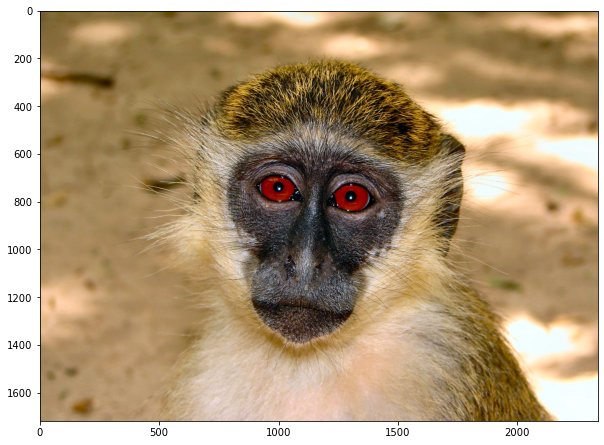

In [155]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

monkey_img = cv.imread('./ImgResources/monkey1.jpeg')
show_img = cv.cvtColor(monkey_img, cv.COLOR_BGR2RGB)

def display_img(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

print('Shape: \n',show_img.shape)
display_img(show_img)

Text(0.5, 1.0, 'Histogram Monkey Unmasked')

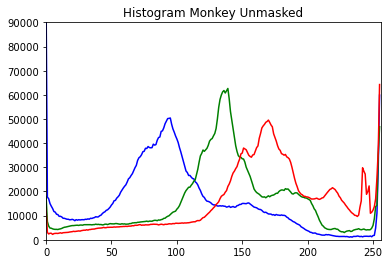

## Histogram on Masked Portion of the image

- Selecting ROI(Region of Interest) and calculate the histogram of masked section.

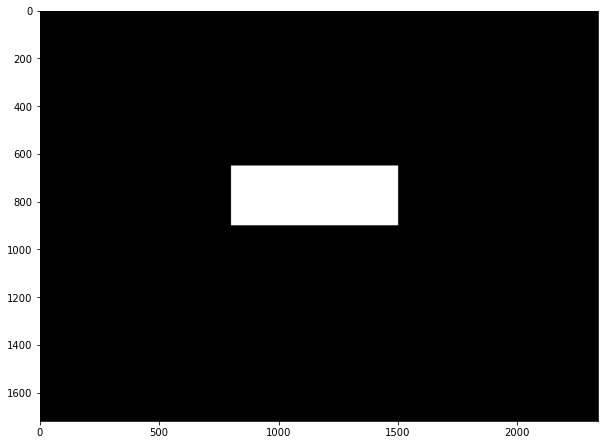

In [169]:
mask = np.zeros(img.shape[:2], np.uint8) # Grabing x and y components
mask[650:900,800:1500] = 255

display_img(mask)

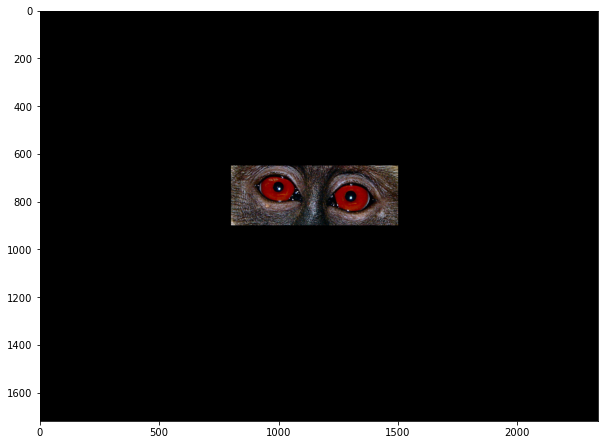

In [170]:
masked_img = cv.bitwise_and(img, img, mask=mask) # Histogram calculation
show_masked_img = cv.bitwise_and(show_img, show_img, mask=mask) # Visualizaiton

display_img(show_masked_img)

Text(0.5, 1.0, 'Histogram Monkey Masked')

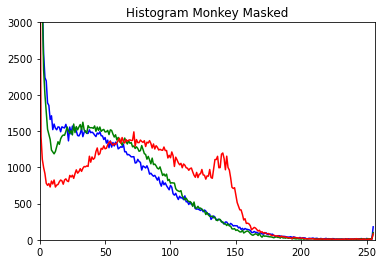

In [172]:
# hist_mask_values_red = cv.calcHist([img],channels=[2], mask=mask,  histSize=[256],ranges=[0,256])
# plt.plot(hist_mask_values_red)

# color = ('b','g','r')

for i, col in enumerate(color):
    histr = cv.calcHist([img],channels = [i], mask=mask, histSize=[256],ranges=[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
    plt.ylim([0,3000])
    
plt.title('Histogram Monkey Masked')

Text(0.5, 1.0, 'Histogram Monkey Unmasked')

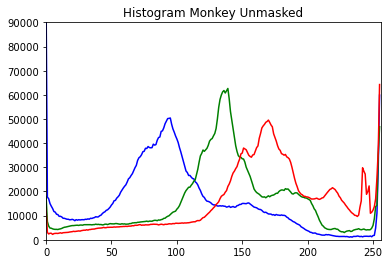

In [173]:
# Hisogram RGB

img = monkey_img

for i, col in enumerate(color):
    histr = cv.calcHist([img],[i], None, [256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
    plt.ylim([0,90000])
    
plt.title('Histogram Monkey Unmasked')

## Histogram Equalization

- Method of contrast adjustment based on the images's histogram.
- Increase and Decrease Contra

Shape: 
 (1600, 1200, 3)


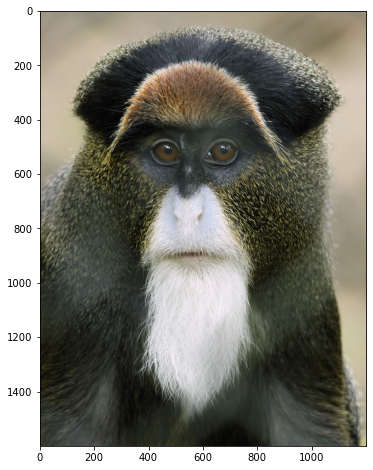

In [203]:
monkey_img = cv.imread('./ImgResources/monkey.jpeg')
rgb_img = cv.cvtColor(monkey_img, cv.COLOR_BGR2RGB)

print('Shape: \n',rgb_img.shape)
display_img(rgb_img)

Text(0.5, 1.0, 'Histogram Monkey')

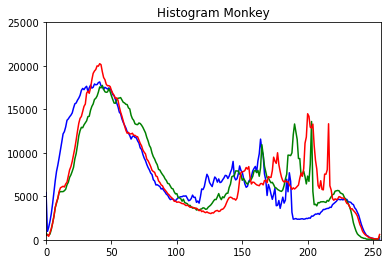

In [192]:
img = monkey_img

for i, col in enumerate(color):
    histr = cv.calcHist([img],[i], None, [256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
    plt.ylim([0,25000])
    
plt.title('Histogram Monkey')

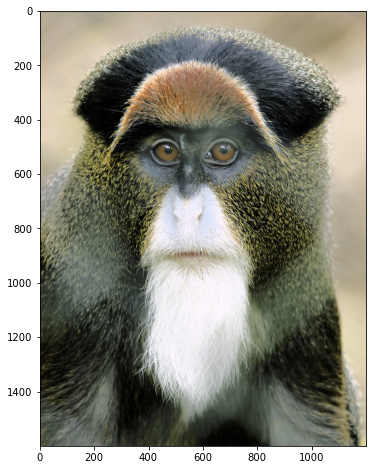

In [204]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hsv[:,:,2] = cv.equalizeHist(hsv[:,:,2]) # HSV = 012 # Isolating value channel

eq_rgb_monkey = cv.cvtColor(hsv,cv.COLOR_HSV2RGB)
display_img(eq_rgb_monkey)

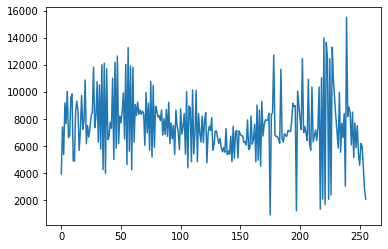

In [205]:
hist_values = cv.calcHist([eq_rgb_monkey],[0], None, [256],[0,256])
plt.plot(hist_values)

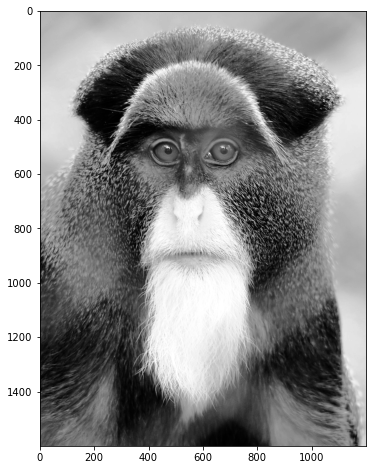

In [207]:
src = cv.cvtColor(monkey_img, cv.COLOR_BGR2GRAY)
eq_monkey = cv.equalizeHist(src)

display_img(eq_monkey)

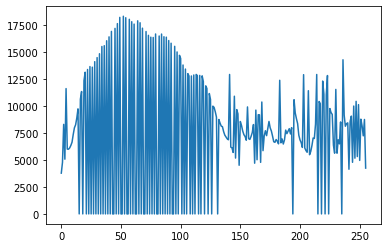

In [208]:
hist_values = cv.calcHist([eq_monkey],[0], None, [256],[0,256])
plt.plot(hist_values)

***